In [2]:
import pandas as pd

In [3]:
file_1 = pd.read_excel(r"D:\ab.xlsx")
file_1.head(5)

,user_id,variant,session_duration_sec,conversion,pages_viewed,device_type,location,app_version
0,user_1,A_Red_Button,125.33,0,4,iOS,Rural,v1.2.1
1,user_2,B_Green_Button,132.51,0,1,Android,Urban,v1.2.2
2,user_3,B_Green_Button,89.86,0,4,iOS,Rural,v1.2.1
3,user_4,B_Green_Button,157.80,0,4,Android,Suburban,v1.3.0
4,user_5,A_Red_Button,136.79,0,1,Android,Urban,v1.3.0


In [4]:
file_1.tail(5)

,user_id,variant,session_duration_sec,conversion,pages_viewed,device_type,location,app_version
995,user_996,A_Red_Button,80.40,0,3,iOS,Suburban,v1.3.0
996,user_997,B_Green_Button,127.31,0,7,Android,Urban,v1.3.0
997,user_998,A_Red_Button,118.89,1,4,Android,Suburban,v1.2.1
998,user_999,B_Green_Button,133.15,0,5,Android,Rural,v1.2.1
999,user_1000,A_Red_Button,99.23,0,2,iOS,Urban,v1.2.2


In [5]:
file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   object 
 1   variant               1000 non-null   object 
 2   session_duration_sec  1000 non-null   float64
 3   conversion            1000 non-null   int64  
 4   pages_viewed          1000 non-null   int64  
 5   device_type           1000 non-null   object 
 6   location              1000 non-null   object 
 7   app_version           1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


##	Which variant had a higher average session duration?

In [6]:
file_1.groupby('variant')['session_duration_sec'].mean()

variant
A_Red_Button      123.486064
B_Green_Button    136.568048
Name: session_duration_sec, dtype: float64

In [7]:
conversion_rate =file_1.groupby('variant')['conversion'].mean()
conversion_rate

variant
A_Red_Button      0.107356
B_Green_Button    0.195171
Name: conversion, dtype: float64

In [8]:
file_1.groupby('variant')['pages_viewed'].mean()

variant
A_Red_Button      3.946322
B_Green_Button    3.857143
Name: pages_viewed, dtype: float64

In [9]:
file_1.groupby([ "variant","device_type"])[["conversion","session_duration_sec","pages_viewed"]].mean()


conversion  session_duration_sec  pages_viewed
variant        device_type                                                
A_Red_Button   Android        0.121951            124.120488      3.930314
               iOS            0.087963            122.643102      3.967593
B_Green_Button Android        0.199336            137.340831      3.767442
               iOS            0.188776            135.381276      3.994898

In [10]:
file_1.groupby(["location", "variant"])[["conversion","session_duration_sec","session_duration_sec"]].mean()

conversion  session_duration_sec  \
location variant                                            
Rural    A_Red_Button      0.099010            122.772475   
         B_Green_Button    0.205128            137.047350   
Suburban A_Red_Button      0.108696            124.753188   
         B_Green_Button    0.166667            139.103116   
Urban    A_Red_Button      0.109848            123.096705   
         B_Green_Button    0.206612            134.890702   

                         session_duration_sec  
location variant                               
Rural    A_Red_Button              122.772475  
         B_Green_Button            137.047350  
Suburban A_Red_Button              124.753188  
         B_Green_Button            139.103116  
Urban    A_Red_Button              123.096705  
         B_Green_Button            134.890702

In [11]:
file_1.groupby(["app_version"])["session_duration_sec"].mean()

app_version
v1.2.1    130.890590
v1.2.2    129.666507
v1.3.0    129.454111
Name: session_duration_sec, dtype: float64

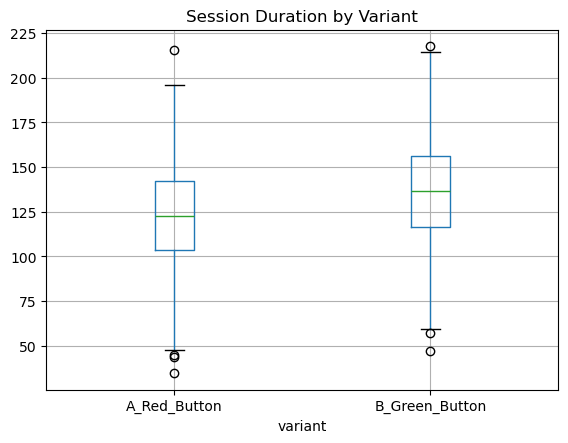

In [12]:
import matplotlib.pyplot as plt

file_1.boxplot(column="session_duration_sec", by="variant")
plt.title("Session Duration by Variant")
plt.suptitle("")
plt.show()


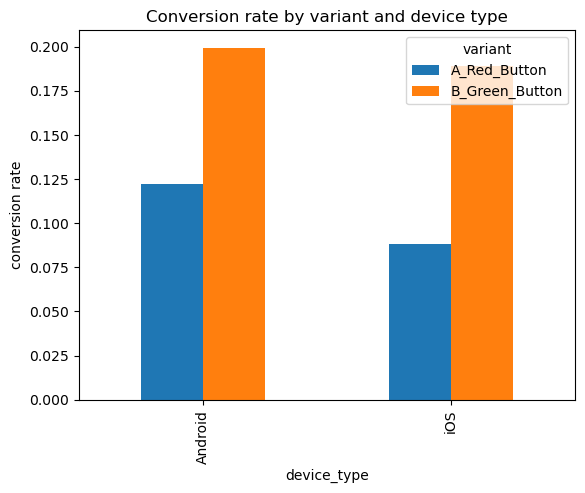

In [13]:
file_1.groupby(["device_type", "variant"])["conversion"].mean().unstack().plot(kind = "bar")
plt.title("Conversion rate by variant and device type")
plt.ylabel("conversion rate")
plt.show()

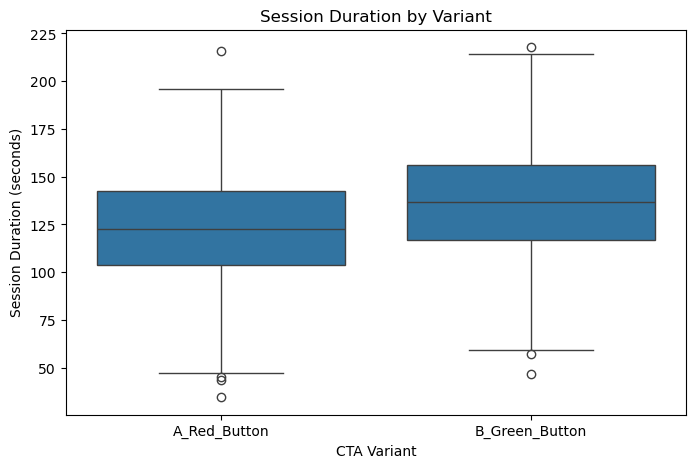

In [14]:
import seaborn as sns
plt.figure(figsize =(8,5))
sns.boxplot(
     data=file_1,
    x="variant",
    y="session_duration_sec",
   
)
plt.title("Session Duration by Variant")
plt.xlabel("CTA Variant")
plt.ylabel("Session Duration (seconds)")
plt.show()

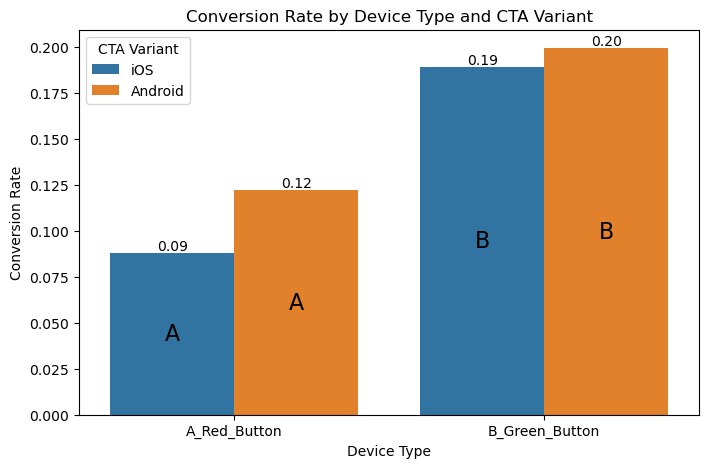

In [22]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=file_1,
    x="variant",
    y="conversion",
    hue="device_type",
    estimator="mean",
    errorbar=None
)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge")

import numpy as np

# Get bar values
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width()/2

        # Condition: highlight high conversion bars
        if height > 0.18:   # threshold example
            ax.text(x, height/2, "B", ha="center", va="center", fontsize=16)
        else:
            ax.text(x, height/2, "A", ha="center", va="center", fontsize=16)


plt.title("Conversion Rate by Device Type and CTA Variant")
plt.xlabel("Device Type")
plt.ylabel("Conversion Rate")
plt.legend(title="CTA Variant")
plt.show()
